<a href="https://colab.research.google.com/github/LasseStok/BAChallenge/blob/main/Samlet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/AugustSchreyer/42186_MBML.git

Cloning into '42186_MBML'...
remote: Enumerating objects: 116, done.
remote: Counting objects: 100% (116/116), done.
remote: Compressing objects: 100% (92/92), done.
remote: Total 116 (delta 63), reused 47 (delta 18), pack-reused 0
Receiving objects: 100% (116/116), 7.16 MiB | 14.27 MiB/s, done.
Resolving deltas: 100% (63/63), done.


# Data visualization

In this section we will go over some of the the important takeaways from the visualizations of the dataset. For a more thorough walkthrough of the initial data analysis, please refer to assignment

In [9]:
#Importing relevant modules
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# matplotlib style options
plt.style.use('ggplot')
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 10)

In [10]:
#Loading the original dataframe
df = pd.read_csv("/content/42186_MBML/data/avocado.csv")

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


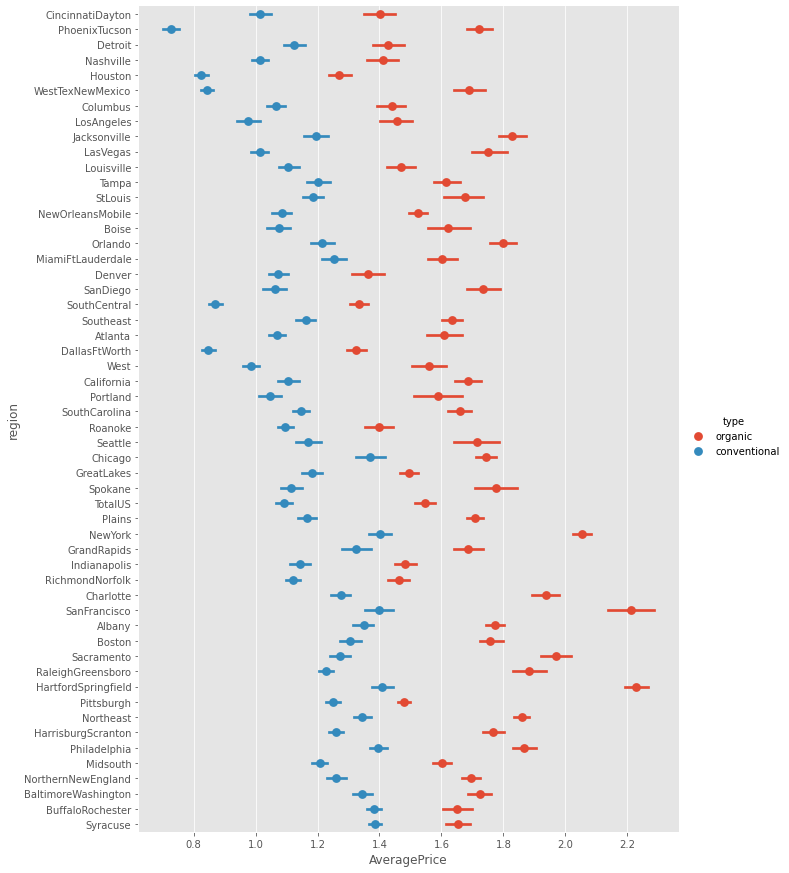

In [11]:
sns.factorplot(x = 'AveragePrice',y = 'region',data=df.sort_values(by=['AveragePrice']),
                   hue='type',
                   height=12,
                   aspect=0.8,
                   join=False,
              )
plt.show()

Below the plot of the average price for TotalUs is displayed. This indicates

In [12]:
#ax = sns.distplot(df["AveragePrice"], color = 'r')
dfReg = df.groupby("region")

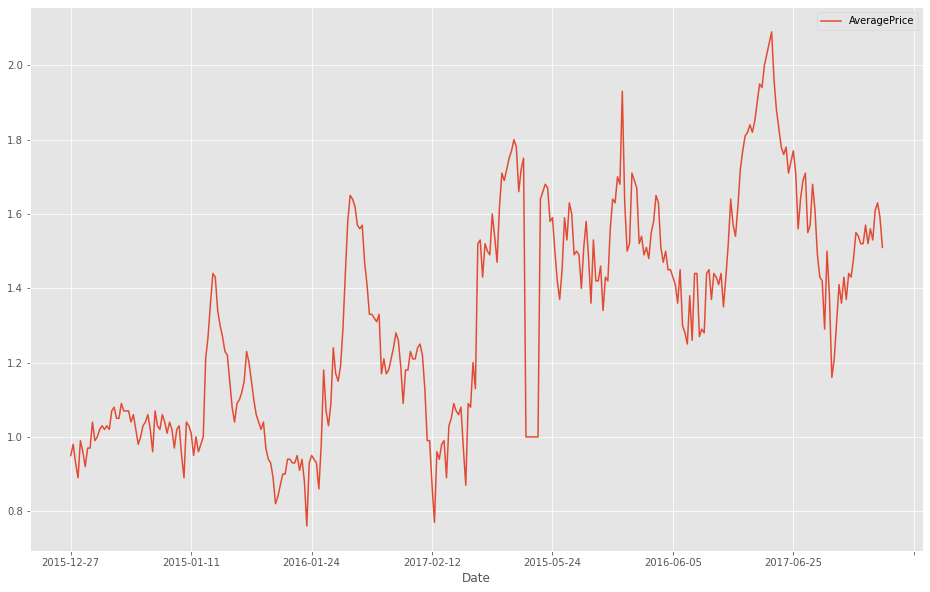

In [13]:
dfReg.get_group("TotalUS").plot(x = "Date", y = "AveragePrice")

# Data processing

### R code

The following data updates done with R-code

In [14]:
%load_ext rpy2.ipython

In [15]:
%%R
rm(list=ls())
library(stringr)
df = read.csv("/content/42186_MBML/data/avocado.csv")
which(is.na(df),arr.ind = T)
str(df)

'data.frame':	18249 obs. of  14 variables:
 $ X           : int  0 1 2 3 4 5 6 7 8 9 ...
 $ Date        : chr  "2015-12-27" "2015-12-20" "2015-12-13" "2015-12-06" ...
 $ AveragePrice: num  1.33 1.35 0.93 1.08 1.28 1.26 0.99 0.98 1.02 1.07 ...
 $ Total.Volume: num  64237 54877 118220 78992 51040 ...
 $ X4046       : num  1037 674 795 1132 941 ...
 $ X4225       : num  54455 44639 109150 71976 43838 ...
 $ X4770       : num  48.2 58.3 130.5 72.6 75.8 ...
 $ Total.Bags  : num  8697 9506 8145 5811 6184 ...
 $ Small.Bags  : num  8604 9408 8042 5677 5986 ...
 $ Large.Bags  : num  93.2 97.5 103.1 133.8 197.7 ...
 $ XLarge.Bags : num  0 0 0 0 0 0 0 0 0 0 ...
 $ type        : chr  "conventional" "conventional" "conventional" "conventional" ...
 $ year        : int  2015 2015 2015 2015 2015 2015 2015 2015 2015 2015 ...
 $ region      : chr  "Albany" "Albany" "Albany" "Albany" ...


In [16]:
%%R
names(df) = c("X","date","price","total_volume","4046","4225","4770","total_bags","small_bags",
              "large_bags","Xlarge_bags","type","year","region")
df$date =as.Date.character(df$date)

df = df[order(df$date),]
df$day = sub("([0-9]{1,4}-[0-9]{1,2})","",df$date)
df$day = gsub("-0","",df$day)
df$day = gsub("-","",df$day)
df$month = sub("([0-9]{4}-0)","",df$date)
df$month = sub("([0-9]{4}-)","",df$month)
df$month = sub("(-[0-9]{1,2})","",df$month)
dates = unique(df$date)
reg=unique(df$region)

In [17]:
%%R

for(i in 1:length(reg)){
  df2_org=df[df$region==reg[i]&df$type=="organic",]
  if(!all( dates%in% df2_org$date )){
    print("Region (organic):")
    print(reg[i])
    print(dates[!dates%in%df2_org$date])
    tmp = data.frame(NA,dates[!dates%in%df2_org$date],NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,c(2015,2017,2017),reg[i],c(6,18,25),c(12,6,6))
    names(tmp) = names(df2_org)
    df2_org = rbind(df2_org,tmp)
    df2_org = df2_org[order(df2_org$date),]
    print(nrow(df2_org))
  }
  df2_conv=df[df$region==reg[i]&df$type!="organic",]
  if(!all( dates%in% df2_conv$date )){
    print("Region (organic):")
    print(reg[i])
  }
  
  if(!all(dates==df2_org$date)){
    print("Organic",reg[i])
  }
  if(!all(dates==df2_conv$date)){
    print("Conv",reg[i])
  }  
  
  if(i==1){
    df2_org = df2_org[,c('date','year','month','day','price','total_volume','4046','4225','4770','total_bags',
                         'small_bags','large_bags','Xlarge_bags')] 
    names(df2_org)[5:13] = paste0(names(df2_org)[5:13],"_",reg[i])
    
    df2_conv = df2_conv[,c('date','year','month','day','price','total_volume','4046','4225','4770','total_bags',
                           'small_bags','large_bags','Xlarge_bags')] 
    names(df2_conv)[5:13] = paste0(names(df2_conv)[5:13],"_",reg[i])
    
    
    names(df2_org)
    organic=df2_org
    conventional=df2_conv
  }else{
    
    df2_org = df2_org[,c('price','total_volume','4046','4225','4770','total_bags',
                         'small_bags','large_bags','Xlarge_bags')] 
    names(df2_org) = paste0(names(df2_org),"_",reg[i])
    
    df2_conv = df2_conv[,c('price','total_volume','4046','4225','4770','total_bags',
                           'small_bags','large_bags','Xlarge_bags')] 
    names(df2_conv) = paste0(names(df2_conv),"_",reg[i])
    organic=cbind(organic,df2_org)
    conventional=cbind(conventional,df2_conv)
  }
}

[1] "Region (organic):"
[1] "WestTexNewMexico"
[1] "2015-12-06" "2017-06-18" "2017-06-25"
[1] 169


In [18]:
%%R

tmp = df[df$region==reg[i],][1,]
tmp = rbind(tmp,tmp,tmp)
tmp[,]=NA
tmp$date=c("2015-12-06","2017-06-18","2017-06-25")
tmp$day=c(6,18,25)
tmp$month = c(12,6,6)
tmp$region=reg[i]
tmp$year=c(2015,2017,2017)
tmp$type="organic"

In [19]:
%%R

df = rbind(df,tmp)
str(df)
df = df[order(df$region,df$type,df$date),]

df$day_factor=NA
df$day_factor[df$day%in%1:7]=0
df$day_factor[df$day%in%8:14]=1
df$day_factor[df$day%in%15:21]=2
df$day_factor[df$day%in%22:28]=3
df$day_factor[df$day%in%29:31]=4

'data.frame':	18252 obs. of  16 variables:
 $ X           : int  51 51 51 51 51 51 51 51 51 51 ...
 $ date        : Date, format: "2015-01-04" "2015-01-04" ...
 $ price       : num  1.22 1 1.08 1.01 1.02 1.4 0.93 1.19 1.11 0.88 ...
 $ total_volume: num  40873 435021 788025 80034 491738 ...
 $ 4046        : num  2820 364302 53987 44562 7194 ...
 $ 4225        : num  28287 23821 552906 24964 396752 ...
 $ 4770        : num  49.9 82.2 39995 2752.3 128.8 ...
 $ total_bags  : num  9716 46816 141137 7756 87663 ...
 $ small_bags  : num  9187 16707 137146 6064 87407 ...
 $ large_bags  : num  530 30109 3991 1691 256 ...
 $ Xlarge_bags : num  0 0 0 0 0 ...
 $ type        : chr  "conventional" "conventional" "conventional" "conventional" ...
 $ year        : num  2015 2015 2015 2015 2015 ...
 $ region      : chr  "Albany" "Atlanta" "BaltimoreWashington" "Boise" ...
 $ day         : chr  "4" "4" "4" "4" ...
 $ month       : chr  "1" "1" "1" "1" ...


In [20]:
%%R

organic$day[organic$day%in%1:7]=0
organic$day[organic$day%in%8:14]=1
organic$day[organic$day%in%15:21]=2
organic$day[organic$day%in%22:28]=3
organic$day[organic$day%in%29:31]=4

conventional$day[conventional$day%in%1:7]=0
conventional$day[conventional$day%in%8:14]=1
conventional$day[conventional$day%in%15:21]=2
conventional$day[conventional$day%in%22:28]=3
conventional$day[conventional$day%in%29:31]=4

In [21]:
%%R -o conventional -o organic

#write.csv(df,"C:/Users/August/OneDrive/Studie/Model Based Machine Learning/42186_MBML/data/avocado_full.csv",row.names = F)

#write.csv(organic,"C:/Users/August/OneDrive/Studie/Model Based Machine Learning/42186_MBML/data/organic.csv",row.names = F)

#write.csv(conventional,"C:/Users/August/OneDrive/Studie/Model Based Machine Learning/42186_MBML/data/conventional.csv",row.names = F)

NULL


In [22]:
conventional = conventional.drop("date", axis = 1)
organic = organic.drop("date", axis = 1)
conventional = conventional.reset_index(drop = True)
organic = organic.reset_index(drop = True)

### Merging datasets

In [23]:
#Import relevant modules
import torch

In [24]:
#Loading datafiles from R
#conventional = pd.read_csv("/content/42186_MBML/data/conventional.csv")
#organic = pd.read_csv("/content/42186_MBML/data/organic.csv")

In [25]:
#Preparing to merge conventional and organic datasets
conventional.columns = [str(col) + '_conv' for col in conventional.columns]
organic.columns = [str(col) + '_orga' for col in organic.columns]
dates=organic.iloc[:,0]

In [26]:
#Merging datasets
merged = pd.concat([conventional, organic], axis=1)
merged

,year_conv,month_conv,day_conv,price_Albany_conv,total_volume_Albany_conv,4046_Albany_conv,4225_Albany_conv,4770_Albany_conv,total_bags_Albany_conv,small_bags_Albany_conv,large_bags_Albany_conv,Xlarge_bags_Albany_conv,price_Atlanta_conv,total_volume_Atlanta_conv,4046_Atlanta_conv,4225_Atlanta_conv,4770_Atlanta_conv,total_bags_Atlanta_conv,small_bags_Atlanta_conv,large_bags_Atlanta_conv,Xlarge_bags_Atlanta_conv,price_BaltimoreWashington_conv,total_volume_BaltimoreWashington_conv,4046_BaltimoreWashington_conv,4225_BaltimoreWashington_conv,4770_BaltimoreWashington_conv,total_bags_BaltimoreWashington_conv,small_bags_BaltimoreWashington_conv,large_bags_BaltimoreWashington_conv,Xlarge_bags_BaltimoreWashington_conv,price_Boise_conv,total_volume_Boise_conv,4046_Boise_conv,4225_Boise_conv,4770_Boise_conv,total_bags_Boise_conv,small_bags_Boise_conv,large_bags_Boise_conv,Xlarge_bags_Boise_conv,price_Boston_conv,...,total_bags_Syracuse_orga,small_bags_Syracuse_orga,large_bags_Syracuse_orga,Xlarge_bags_Syracuse_orga,price_Tampa_orga,total_volume_Tampa_orga,4046_Tampa_orga,4225_Tampa_orga,4770_Tampa_orga,total_bags_Tampa_orga,small_bags_Tampa_orga,large_bags_Tampa_orga,Xlarge_bags_Tampa_orga,price_TotalUS_orga,total_volume_TotalUS_orga,4046_TotalUS_orga,4225_TotalUS_orga,4770_TotalUS_orga,total_bags_TotalUS_orga,small_bags_TotalUS_orga,large_bags_TotalUS_orga,Xlarge_bags_TotalUS_orga,price_West_orga,total_volume_West_orga,4046_West_orga,4225_West_orga,4770_West_orga,total_bags_West_orga,small_bags_West_orga,large_bags_West_orga,Xlarge_bags_West_orga,price_WestTexNewMexico_orga,total_volume_WestTexNewMexico_orga,4046_WestTexNewMexico_orga,4225_WestTexNewMexico_orga,4770_WestTexNewMexico_orga,total_bags_WestTexNewMexico_orga,small_bags_WestTexNewMexico_orga,large_bags_WestTexNewMexico_orga,Xlarge_bags_WestTexNewMexico_orga
0,2015,1,0,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.00,1.01,80034.32,44562.12,24964.23,2752.35,7755.62,6064.30,1691.32,0.00,1.02,...,490.68,490.68,0.00,0.0,1.70,1885.48,748.62,30.19,0.0,1106.67,1106.67,0.00,0.0,1.46,612910.15,233286.13,216611.20,4370.99,158641.83,115068.71,43573.12,0.00,1.40,187548.30,70313.71,72942.11,24.30,44268.18,10023.72,34244.46,0.00,1.64,6182.81,1561.30,2958.17,0.00,1663.34,1663.34,0.00,0.0
1,2015,1,1,1.24,41195.08,1002.85,31640.34,127.12,8424.77,8036.04,388.73,0.00,1.11,397542.72,330411.24,18958.22,1135.18,47038.08,21309.61,25728.47,0.00,1.17,670231.94,51460.64,420837.82,42526.96,155406.52,151330.87,4075.65,0.00,1.18,57355.52,38112.34,10997.54,3321.89,4923.75,3295.11,1628.64,0.00,1.10,...,565.40,565.40,0.00,0.0,1.84,1258.62,814.13,44.49,0.0,400.00,400.00,0.00,0.0,1.42,669528.88,270966.74,260971.60,3830.42,133760.12,106844.49,26915.63,0.00,1.39,223156.55,80139.16,111395.01,63.88,31558.50,9296.76,22261.74,0.00,1.69,6861.73,1822.28,2377.54,0.00,2661.91,2656.66,5.25,0.0
2,2015,1,2,1.17,44511.28,914.14,31540.32,135.77,11921.05,11651.09,269.96,0.00,1.11,431490.99,372236.92,18701.90,511.69,40040.48,16782.71,23257.77,0.00,1.23,657741.34,49947.16,393359.60,40576.08,173858.50,169390.88,4467.62,0.00,1.08,62870.49,50354.95,6342.37,2257.23,3915.94,1119.18,2796.76,0.00,1.23,...,476.34,476.34,0.00,0.0,1.73,1751.20,810.58,23.95,0.0,916.67,916.67,0.00,0.0,1.42,713120.00,254319.58,311811.01,4020.85,142968.56,101850.23,41118.33,0.00,1.33,251749.94,64328.76,147608.30,69.05,39743.83,7442.17,32301.66,0.00,1.71,5508.20,1793.64,2078.72,0.00,1635.84,1620.00,15.84,0.0
3,2015,1,3,1.06,45147.50,941.38,33196.16,164.14,10845.82,10103.35,742.47,0.00,1.10,449332.85,393408.17,18718.27,594.25,36612.16,13176.39,23435.77,0.00,1.20,692934.46,49696.14,386398.73,39488.95,217350.64,209761.81,7588.83,0.00,1.03,66069.21,51922.06,7555.95,2061.16,4530.04,2009.53,2520.51,0.00,1.17,...,712.86,712.86,0.00,0.0,1.75,1460.04,715.42,17.95,0.0,726.67,726.67,0.00,0.0,1.53,556368.86,207

In [27]:
#Updating date values
merged.drop(["year_orga", "month_orga", "day_orga"], axis=1, inplace=True)
months = pd.get_dummies(merged["month_conv"])
months.columns = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
#days = pd.get_dummies(merged["day_conv"])
#days.columns = ["W1", "W2", "W3", "W4", "W5"]
years = merged.year_conv - 2015
years.name = "years_since_2015"

In [28]:
merged = pd.concat([merged, years,months], axis=1)
merged = merged.drop(["month_conv", "day_conv", "year_conv"], axis=1)
merged

,price_Albany_conv,total_volume_Albany_conv,4046_Albany_conv,4225_Albany_conv,4770_Albany_conv,total_bags_Albany_conv,small_bags_Albany_conv,large_bags_Albany_conv,Xlarge_bags_Albany_conv,price_Atlanta_conv,total_volume_Atlanta_conv,4046_Atlanta_conv,4225_Atlanta_conv,4770_Atlanta_conv,total_bags_Atlanta_conv,small_bags_Atlanta_conv,large_bags_Atlanta_conv,Xlarge_bags_Atlanta_conv,price_BaltimoreWashington_conv,total_volume_BaltimoreWashington_conv,4046_BaltimoreWashington_conv,4225_BaltimoreWashington_conv,4770_BaltimoreWashington_conv,total_bags_BaltimoreWashington_conv,small_bags_BaltimoreWashington_conv,large_bags_BaltimoreWashington_conv,Xlarge_bags_BaltimoreWashington_conv,price_Boise_conv,total_volume_Boise_conv,4046_Boise_conv,4225_Boise_conv,4770_Boise_conv,total_bags_Boise_conv,small_bags_Boise_conv,large_bags_Boise_conv,Xlarge_bags_Boise_conv,price_Boston_conv,total_volume_Boston_conv,4046_Boston_conv,4225_Boston_conv,...,price_TotalUS_orga,total_volume_TotalUS_orga,4046_TotalUS_orga,4225_TotalUS_orga,4770_TotalUS_orga,total_bags_TotalUS_orga,small_bags_TotalUS_orga,large_bags_TotalUS_orga,Xlarge_bags_TotalUS_orga,price_West_orga,total_volume_West_orga,4046_West_orga,4225_West_orga,4770_West_orga,total_bags_West_orga,small_bags_West_orga,large_bags_West_orga,Xlarge_bags_West_orga,price_WestTexNewMexico_orga,total_volume_WestTexNewMexico_orga,4046_WestTexNewMexico_orga,4225_WestTexNewMexico_orga,4770_WestTexNewMexico_orga,total_bags_WestTexNewMexico_orga,small_bags_WestTexNewMexico_orga,large_bags_WestTexNewMexico_orga,Xlarge_bags_WestTexNewMexico_orga,years_since_2015,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.00,1.01,80034.32,44562.12,24964.23,2752.35,7755.62,6064.30,1691.32,0.00,1.02,491738.00,7193.87,396752.18,...,1.46,612910.15,233286.13,216611.20,4370.99,158641.83,115068.71,43573.12,0.00,1.40,187548.30,70313.71,72942.11,24.30,44268.18,10023.72,34244.46,0.00,1.64,6182.81,1561.30,2958.17,0.00,1663.34,1663.34,0.00,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,1.24,41195.08,1002.85,31640.34,127.12,8424.77,8036.04,388.73,0.00,1.11,397542.72,330411.24,18958.22,1135.18,47038.08,21309.61,25728.47,0.00,1.17,670231.94,51460.64,420837.82,42526.96,155406.52,151330.87,4075.65,0.00,1.18,57355.52,38112.34,10997.54,3321.89,4923.75,3295.11,1628.64,0.00,1.10,437771.89,5548.11,320577.36,...,1.42,669528.88,270966.74,260971.60,3830.42,133760.12,106844.49,26915.63,0.00,1.39,223156.55,80139.16,111395.01,63.88,31558.50,9296.76,22261.74,0.00,1.69,6861.73,1822.28,2377.54,0.00,2661.91,2656.66,5.25,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1.17,44511.28,914.14,31540.32,135.77,11921.05,11651.09,269.96,0.00,1.11,431490.99,372236.92,18701.90,511.69,40040.48,16782.71,23257.77,0.00,1.23,657741.34,49947.16,393359.60,40576.08,173858.50,169390.88,4467.62,0.00,1.08,62870.49,50354.95,6342.37,2257.23,3915.94,1119.18,2796.76,0.00,1.23,401331.33,4383.76,287778.52,...,1.42,713120.00,254319.58,311811.01,4020.85,142968.56,101850.23,41118.33,0.00,1.33,251749.94,64328.76,147608.30,69.05,39743.83,7442.17,32301.66,0.00,1.71,5508.20,1793.64,2078.72,0.00,1635.84,1620.00,15.84,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1.06,45147.50,941.38,33196.16,164.14,10845.82,10103.35,742.47,0.00,1.10,449332.85,393408.17,18718.27,594.25,36612.16,13176.39,23435.77,0.00,1.20,692934.46,49696.14,386398.73,39488.95,217350.64,209761.81,7588.83,0.00,1.03,66069.21,51922.06,7555.95,2061.16,4530.04,2009.53,2520.51,0.00,1.17,409343.56,4730.77,288094.65,...,1.53,556368.86,207494.87,212312.02,4753.87,131808.10,95964.83,35843.27,0.00,1.52,166494.38,61454.35,68624.86,749.30,35665.87,9756.03,25909.84,0.00,1.63,7324.06,1934.46,3032.72,0.00,2356.88,2320.00,36.88,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0.99,70873.60,1353.90,60017.20,179.32,9323.18,9170.82,152.36,0.00,0.96,636771.37,553198.56,31583.38,294.94,51694.49,1055

## Preparing diferent versions of the X dataframe

In this section several versions of the X dataframe is prepared for further analysis. In some instances it may be beneficial to exclude columns with sparse data such as XLarge_bags, and instead only include the total_bags.

In [29]:
# Preparing X and y
# Impute data
X_df = merged.loc[:,~merged.columns.str.contains("price")]
dates = X_df.iloc[:,-13:]
rest = X_df.iloc[:,:-13]
rest = rest.interpolate(method='linear',axis=0)
X_columns = rest.columns

#Normalize dataset
rest = rest/rest.max()

#Some values are nan again due to dividing by 0, they are set to 0 again
rest = rest.fillna(0)
X = pd.concat([dates,rest], axis=1)

In [30]:
#This part adds two binary columns for each region that will be used in our multivariate model
conv_columns = [str(col) + '_conv0' for col in df["region"].unique()]
orga_columns = [str(col) + '_conv1' for col in df["region"].unique()]
binary_conv_orga = np.ones((169,108))
binary_conv_orga[:,:54] = 0
binary_conv_orga = pd.DataFrame(binary_conv_orga,
                                columns = conv_columns+orga_columns)
X_with_binary = pd.concat([X,binary_conv_orga],axis = 1)

In [31]:
#this dataset only contains the total volume
X_total_volume = pd.concat([dates,X.loc[:,X.columns.str.contains("total_volume")],binary_conv_orga], axis = 1)
#Dataset excluding amount of individual bags sold
X_tot_bags =  X_with_binary.loc[:,~X_with_binary.columns.str.contains('|'.join(["total_volume","small", "large"]))]
X_all_bags =  X_with_binary.loc[:,~X_with_binary.columns.str.contains('|'.join(["total"]))]

In [32]:
#X_total_volume.to_csv("X_total.csv",index = False)
X_total_volume

,years_since_2015,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,total_volume_Albany_conv,total_volume_Atlanta_conv,total_volume_BaltimoreWashington_conv,total_volume_Boise_conv,total_volume_Boston_conv,total_volume_BuffaloRochester_conv,total_volume_California_conv,total_volume_Charlotte_conv,total_volume_Chicago_conv,total_volume_CincinnatiDayton_conv,total_volume_Columbus_conv,total_volume_DallasFtWorth_conv,total_volume_Denver_conv,total_volume_Detroit_conv,total_volume_GrandRapids_conv,total_volume_GreatLakes_conv,total_volume_HarrisburgScranton_conv,total_volume_HartfordSpringfield_conv,total_volume_Houston_conv,total_volume_Indianapolis_conv,total_volume_Jacksonville_conv,total_volume_LasVegas_conv,total_volume_LosAngeles_conv,total_volume_Louisville_conv,total_volume_MiamiFtLauderdale_conv,total_volume_Midsouth_conv,total_volume_Nashville_conv,...,GrandRapids_conv1,GreatLakes_conv1,HarrisburgScranton_conv1,HartfordSpringfield_conv1,Houston_conv1,Indianapolis_conv1,Jacksonville_conv1,LasVegas_conv1,LosAngeles_conv1,Louisville_conv1,MiamiFtLauderdale_conv1,Midsouth_conv1,Nashville_conv1,NewOrleansMobile_conv1,NewYork_conv1,Northeast_conv1,NorthernNewEngland_conv1,Orlando_conv1,Philadelphia_conv1,PhoenixTucson_conv1,Pittsburgh_conv1,Plains_conv1,Portland_conv1,RaleighGreensboro_conv1,RichmondNorfolk_conv1,Roanoke_conv1,Sacramento_conv1,SanDiego_conv1,SanFrancisco_conv1,Seattle_conv1,SouthCarolina_conv1,SouthCentral_conv1,Southeast_conv1,Spokane_conv1,StLouis_conv1,Syracuse_conv1,Tampa_conv1,TotalUS_conv1,West_conv1,WestTexNewMexico_conv1
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.188583,0.454192,0.643232,0.586858,0.491845,0.577965,0.515208,0.403750,0.434399,0.424441,0.475821,0.576198,0.483585,0.419849,0.633323,0.476802,0.515423,0.635726,0.446308,0.477370,0.385169,0.467282,0.490320,0.595676,0.412181,0.487717,0.413913,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0.190068,0.415062,0.547082,0.420564,0.437867,0.528090,0.537288,0.389003,0.445387,0.373974,0.377154,0.598649,0.482494,0.377229,0.452741,0.432381,0.451725,0.445189,0.445922,0.413236,0.250304,0.403510,0.496085,0.442383,0.261543,0.441885,0.382439,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0.205369,0.450506,0.536886,0.461003,0.401418,0.532161,0.496800,0.371317,0.442539,0.326230,0.349283,0.579016,0.585000,0.331374,0.367311,0.423722,0.461504,0.438636,0.427357,0.445143,0.249649,0.342802,0.511986,0.503920,0.309107,0.440909,0.366187,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0.208304,0.469134,0.565613,0.484458,0.409432,0.567025,0.439635,0.406824,0.413525,0.396559,0.350919,0.534791,0.503543,0.314949,0.352884,0.412796,0.520819,0.461520,0.413105,0.445602,0.275856,0.366800,0.425940,0.510134,0.303704,0.469282,0.359527,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0.327001,0.664833,0.822313,0.832822,0.490128,0.765230,0.805467,0.617787,0.628793,0.558765,0.649833,0.737821,0.716751,0.612977,0.756800,0.687003,0.715585,0.570205,0.537574,0.731430,0.596950,0.544258,0.737072,0.739009,0.574744,0.693861,0.565295,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [33]:
#X_tot_bags.to_csv("X_tot_bag.csv",index = False)
X_tot_bags

,years_since_2015,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,4046_Albany_conv,4225_Albany_conv,4770_Albany_conv,total_bags_Albany_conv,4046_Atlanta_conv,4225_Atlanta_conv,4770_Atlanta_conv,total_bags_Atlanta_conv,4046_BaltimoreWashington_conv,4225_BaltimoreWashington_conv,4770_BaltimoreWashington_conv,total_bags_BaltimoreWashington_conv,4046_Boise_conv,4225_Boise_conv,4770_Boise_conv,total_bags_Boise_conv,4046_Boston_conv,4225_Boston_conv,4770_Boston_conv,total_bags_Boston_conv,4046_BuffaloRochester_conv,4225_BuffaloRochester_conv,4770_BuffaloRochester_conv,total_bags_BuffaloRochester_conv,4046_California_conv,4225_California_conv,4770_California_conv,...,GrandRapids_conv1,GreatLakes_conv1,HarrisburgScranton_conv1,HartfordSpringfield_conv1,Houston_conv1,Indianapolis_conv1,Jacksonville_conv1,LasVegas_conv1,LosAngeles_conv1,Louisville_conv1,MiamiFtLauderdale_conv1,Midsouth_conv1,Nashville_conv1,NewOrleansMobile_conv1,NewYork_conv1,Northeast_conv1,NorthernNewEngland_conv1,Orlando_conv1,Philadelphia_conv1,PhoenixTucson_conv1,Pittsburgh_conv1,Plains_conv1,Portland_conv1,RaleighGreensboro_conv1,RichmondNorfolk_conv1,Roanoke_conv1,Sacramento_conv1,SanDiego_conv1,SanFrancisco_conv1,Seattle_conv1,SouthCarolina_conv1,SouthCentral_conv1,Southeast_conv1,Spokane_conv1,StLouis_conv1,Syracuse_conv1,Tampa_conv1,TotalUS_conv1,West_conv1,WestTexNewMexico_conv1
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.080758,0.144526,0.008482,0.263986,0.658538,0.112482,0.019322,0.109898,0.266002,0.686804,0.478109,0.289091,0.640770,0.683346,0.117893,0.082740,0.084431,0.458230,0.001574,0.398009,0.124376,0.560492,0.016332,0.564651,0.593151,0.553436,0.323947,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0.028724,0.161657,0.021607,0.228892,0.597274,0.089520,0.266992,0.110420,0.253553,0.522753,0.508377,0.318320,0.548027,0.301036,0.142289,0.052528,0.065115,0.370251,0.001488,0.506345,0.062502,0.513113,0.011868,0.528425,0.602734,0.606630,0.244053,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0.026183,0.161146,0.023078,0.323882,0.672881,0.088309,0.120348,0.093994,0.246096,0.488620,0.485055,0.356115,0.724067,0.173610,0.096685,0.041777,0.051450,0.332370,0.001619,0.495048,0.061856,0.622555,0.019871,0.428769,0.580054,0.514558,0.286563,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0.026964,0.169606,0.027900,0.294669,0.711152,0.088387,0.139766,0.085946,0.244859,0.479974,0.472060,0.445201,0.746601,0.206829,0.088287,0.048328,0.055523,0.332735,0.000562,0.528807,0.050283,0.543529,0.011111,0.579136,0.496639,0.446063,0.354711,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0.038779,0.306640,0.030480,0.253301,1.000000,0.149135,0.069369,0.121351,0.459043,0.827299,1.000000,0.337129,0.970547,1.000000,0.124422,0.070889,0.071392,0.431319,0.003333,0.500396,0.080599,0.651848,0.016770,0.858286,1.000000,0.844580,0.417412,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,3,0,0,0,0,1,0,0,0,0,0,0,0,0.296989,0.305139,0.008159,0.927514,0.466158,0.165664,0.371467,0.684755,0.513495,0.595961,0.05697

In [34]:
#X_all_bags.to_csv("X_all_bag.csv",index = False)
X_all_bags

,years_since_2015,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,4046_Albany_conv,4225_Albany_conv,4770_Albany_conv,small_bags_Albany_conv,large_bags_Albany_conv,Xlarge_bags_Albany_conv,4046_Atlanta_conv,4225_Atlanta_conv,4770_Atlanta_conv,small_bags_Atlanta_conv,large_bags_Atlanta_conv,Xlarge_bags_Atlanta_conv,4046_BaltimoreWashington_conv,4225_BaltimoreWashington_conv,4770_BaltimoreWashington_conv,small_bags_BaltimoreWashington_conv,large_bags_BaltimoreWashington_conv,Xlarge_bags_BaltimoreWashington_conv,4046_Boise_conv,4225_Boise_conv,4770_Boise_conv,small_bags_Boise_conv,large_bags_Boise_conv,Xlarge_bags_Boise_conv,4046_Boston_conv,4225_Boston_conv,4770_Boston_conv,...,GrandRapids_conv1,GreatLakes_conv1,HarrisburgScranton_conv1,HartfordSpringfield_conv1,Houston_conv1,Indianapolis_conv1,Jacksonville_conv1,LasVegas_conv1,LosAngeles_conv1,Louisville_conv1,MiamiFtLauderdale_conv1,Midsouth_conv1,Nashville_conv1,NewOrleansMobile_conv1,NewYork_conv1,Northeast_conv1,NorthernNewEngland_conv1,Orlando_conv1,Philadelphia_conv1,PhoenixTucson_conv1,Pittsburgh_conv1,Plains_conv1,Portland_conv1,RaleighGreensboro_conv1,RichmondNorfolk_conv1,Roanoke_conv1,Sacramento_conv1,SanDiego_conv1,SanFrancisco_conv1,Seattle_conv1,SouthCarolina_conv1,SouthCentral_conv1,Southeast_conv1,Spokane_conv1,StLouis_conv1,Syracuse_conv1,Tampa_conv1,TotalUS_conv1,West_conv1,WestTexNewMexico_conv1
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.080758,0.144526,0.008482,0.304947,0.019464,0.000000,0.658538,0.112482,0.019322,0.057154,0.138534,0.000000,0.266002,0.686804,0.478109,0.283710,0.091774,0.000000,0.640770,0.683346,0.117893,0.064758,0.041770,0.000000,0.084431,0.458230,0.001574,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0.028724,0.161657,0.021607,0.266745,0.014288,0.000000,0.597274,0.089520,0.266992,0.072899,0.118380,0.000000,0.253553,0.522753,0.508377,0.313053,0.093730,0.000000,0.548027,0.301036,0.142289,0.035187,0.040222,0.000000,0.065115,0.370251,0.001488,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0.026183,0.161146,0.023078,0.386741,0.009923,0.000000,0.672881,0.088309,0.120348,0.057413,0.107012,0.000000,0.246096,0.488620,0.485055,0.350413,0.102744,0.000000,0.724067,0.173610,0.096685,0.011951,0.069070,0.000000,0.051450,0.332370,0.001619,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0.026964,0.169606,0.027900,0.335366,0.027291,0.000000,0.711152,0.088387,0.139766,0.045076,0.107831,0.000000,0.244859,0.479974,0.472060,0.433928,0.174524,0.000000,0.746601,0.206829,0.088287,0.021459,0.062248,0.000000,0.055523,0.332735,0.000562,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0.038779,0.306640,0.030480,0.304412,0.005600,0.000000,1.000000,0.149135,0.069369,0.036104,0.189294,0.000000,0.459043,0.827299,1.000000,0.330815,0.107456,0.000000,0.970547,1.000000,0.124422,0.051975,0.043900,0.000000,0.071392,0.431319,0.003333,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,3,0,0,0,0,1,0,0,0,0,0,0,0,0.296989,0.305139,0.008159,1.000000,0.136091,0.106897,0.466158,0.165664,0.371467,0.

In [35]:
#A few instances with missing y-values are updated:
y = merged.loc[:,merged.columns.str.contains("price")]
y = y.interpolate(method='linear',axis=0)
#y.to_csv("y_values.csv",index = False)


In [36]:
#Creating dataframe for autoregressive model
y_ar=y.copy()
y_ar=y_ar.shift(periods=1)
y_ar.columns = [str(col) + '_(t-1)' for col in y_ar.columns]
#y_ar.to_csv("y_ar_values.csv",index = False)

X_ar_total = pd.concat((X_total_volume,y_ar),axis=1)
X_ar_total = X_ar_total.drop(labels=0,axis=0)
#X_ar_total.to_csv("X_ar_total.csv",index = False)

X_ar_tot_bags = pd.concat((X_tot_bags,y_ar),axis=1)
X_ar_tot_bags = X_ar_tot_bags.drop(labels=0,axis=0)
#X_ar_tot_bags.to_csv("X_ar_tot_bags.csv",index = False)

X_ar_all_bags = pd.concat((X_all_bags,y_ar),axis=1)
X_ar_all_bags = X_ar_all_bags.drop(labels=0,axis=0)
#X_ar_all_bags.to_csv("X_ar_all_bags.csv",index = False)

In [38]:
X_ar_total.head()

,years_since_2015,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,total_volume_Albany_conv,total_volume_Atlanta_conv,total_volume_BaltimoreWashington_conv,total_volume_Boise_conv,total_volume_Boston_conv,total_volume_BuffaloRochester_conv,total_volume_California_conv,total_volume_Charlotte_conv,total_volume_Chicago_conv,total_volume_CincinnatiDayton_conv,total_volume_Columbus_conv,total_volume_DallasFtWorth_conv,total_volume_Denver_conv,total_volume_Detroit_conv,total_volume_GrandRapids_conv,total_volume_GreatLakes_conv,total_volume_HarrisburgScranton_conv,total_volume_HartfordSpringfield_conv,total_volume_Houston_conv,total_volume_Indianapolis_conv,total_volume_Jacksonville_conv,total_volume_LasVegas_conv,total_volume_LosAngeles_conv,total_volume_Louisville_conv,total_volume_MiamiFtLauderdale_conv,total_volume_Midsouth_conv,total_volume_Nashville_conv,...,price_GrandRapids_orga_(t-1),price_GreatLakes_orga_(t-1),price_HarrisburgScranton_orga_(t-1),price_HartfordSpringfield_orga_(t-1),price_Houston_orga_(t-1),price_Indianapolis_orga_(t-1),price_Jacksonville_orga_(t-1),price_LasVegas_orga_(t-1),price_LosAngeles_orga_(t-1),price_Louisville_orga_(t-1),price_MiamiFtLauderdale_orga_(t-1),price_Midsouth_orga_(t-1),price_Nashville_orga_(t-1),price_NewOrleansMobile_orga_(t-1),price_NewYork_orga_(t-1),price_Northeast_orga_(t-1),price_NorthernNewEngland_orga_(t-1),price_Orlando_orga_(t-1),price_Philadelphia_orga_(t-1),price_PhoenixTucson_orga_(t-1),price_Pittsburgh_orga_(t-1),price_Plains_orga_(t-1),price_Portland_orga_(t-1),price_RaleighGreensboro_orga_(t-1),price_RichmondNorfolk_orga_(t-1),price_Roanoke_orga_(t-1),price_Sacramento_orga_(t-1),price_SanDiego_orga_(t-1),price_SanFrancisco_orga_(t-1),price_Seattle_orga_(t-1),price_SouthCarolina_orga_(t-1),price_SouthCentral_orga_(t-1),price_Southeast_orga_(t-1),price_Spokane_orga_(t-1),price_StLouis_orga_(t-1),price_Syracuse_orga_(t-1),price_Tampa_orga_(t-1),price_TotalUS_orga_(t-1),price_West_orga_(t-1),price_WestTexNewMexico_orga_(t-1)
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0.190068,0.415062,0.547082,0.420564,0.437867,0.528090,0.537288,0.389003,0.445387,0.373974,0.377154,0.598649,0.482494,0.377229,0.452741,0.432381,0.451725,0.445189,0.445922,0.413236,0.250304,0.403510,0.496085,0.442383,0.261543,0.441885,0.382439,...,1.60,1.54,1.68,2.32,1.22,1.63,1.81,1.50,1.25,1.48,1.82,1.56,1.84,1.41,1.93,1.88,1.83,1.80,1.72,1.12,1.81,1.69,1.28,2.01,1.54,1.39,1.33,1.23,1.18,1.49,1.86,1.35,1.75,1.30,1.80,1.72,1.70,1.46,1.40,1.64
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0.205369,0.450506,0.536886,0.461003,0.401418,0.532161,0.496800,0.371317,0.442539,0.326230,0.349283,0.579016,0.585000,0.331374,0.367311,0.423722,0.461504,0.438636,0.427357,0.445143,0.249649,0.342802,0.511986,0.503920,0.309107,0.440909,0.366187,...,1.87,1.69,1.65,2.28,1.26,1.83,1.91,1.54,1.08,1.79,1.85,1.52,1.92,1.44,2.03,1.86,1.88,1.92,1.63,1.36,1.82,1.68,1.22,1.98,1.66,1.47,1.27,1.05,1.12,1.46,2.06,1.39,1.83,1.38,1.84,1.66,1.84,1.42,1.39,1.69
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0.208304,0.469134,0.565613,0.484458,0.409432,0.567025,0.439635,0.406824,0.413525,0.396559,0.350919,0.534791,0.503543,0.314949,0.352884,0.412796,0.520819,0.461520,0.413105,0.445602,0.275856,0.366800,0.425940,0.510134,0.303704,0.469282,0.359527,...,1.88,1.73,1.94,2.35,1.20,1.96,1.82,1.63,1.29,1.79,1.87,1.65,1.81,0.98,2.08,1.94,1.88,1.79,1.93,1.36,1.55,1.80,1.24,1.97,1.62,1.48,1.13,1.29,1.27,1.45,1.93,1.27,1.79,1.44,1.92,1.84,1.73,1.42,1.33,1.71
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0.327001,0.664833,0.822313,0.832822,0.490128,0.765230,0.805467,0.617787,0.628793,0.558765,0.649833,0.737821,0.716751,0.612977,0.756800,0.687003,0.715585,0.570205,0.537574,0.731430,0.596950,0.544258,0.737072,0.739009,0.574744,0.693861,0.565295,...,2.01,1.63,1.80,2.21,1.24,1.78,1.88,1.66,1.23,1.68,1.84,1.63,1.71,1.47,2.02,1.92,1.90,1.82,1.82,1.54,1.70,1.80,1.35,2.02,1.57,1.47,1.44,1.26,1.34,1.70,2.01,1.37,1.81,1.66,1.93,1.77,1.75,1.53,1.52,1.63
5,0,0,0,0,0,1,0,0,0,0,0,0,0,0.236478,0.453004,0.689682,0.513066,0.610118,0.660030,0.523581

In [39]:
X_ar_tot_bags.head()

,years_since_2015,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,4046_Albany_conv,4225_Albany_conv,4770_Albany_conv,total_bags_Albany_conv,4046_Atlanta_conv,4225_Atlanta_conv,4770_Atlanta_conv,total_bags_Atlanta_conv,4046_BaltimoreWashington_conv,4225_BaltimoreWashington_conv,4770_BaltimoreWashington_conv,total_bags_BaltimoreWashington_conv,4046_Boise_conv,4225_Boise_conv,4770_Boise_conv,total_bags_Boise_conv,4046_Boston_conv,4225_Boston_conv,4770_Boston_conv,total_bags_Boston_conv,4046_BuffaloRochester_conv,4225_BuffaloRochester_conv,4770_BuffaloRochester_conv,total_bags_BuffaloRochester_conv,4046_California_conv,4225_California_conv,4770_California_conv,...,price_GrandRapids_orga_(t-1),price_GreatLakes_orga_(t-1),price_HarrisburgScranton_orga_(t-1),price_HartfordSpringfield_orga_(t-1),price_Houston_orga_(t-1),price_Indianapolis_orga_(t-1),price_Jacksonville_orga_(t-1),price_LasVegas_orga_(t-1),price_LosAngeles_orga_(t-1),price_Louisville_orga_(t-1),price_MiamiFtLauderdale_orga_(t-1),price_Midsouth_orga_(t-1),price_Nashville_orga_(t-1),price_NewOrleansMobile_orga_(t-1),price_NewYork_orga_(t-1),price_Northeast_orga_(t-1),price_NorthernNewEngland_orga_(t-1),price_Orlando_orga_(t-1),price_Philadelphia_orga_(t-1),price_PhoenixTucson_orga_(t-1),price_Pittsburgh_orga_(t-1),price_Plains_orga_(t-1),price_Portland_orga_(t-1),price_RaleighGreensboro_orga_(t-1),price_RichmondNorfolk_orga_(t-1),price_Roanoke_orga_(t-1),price_Sacramento_orga_(t-1),price_SanDiego_orga_(t-1),price_SanFrancisco_orga_(t-1),price_Seattle_orga_(t-1),price_SouthCarolina_orga_(t-1),price_SouthCentral_orga_(t-1),price_Southeast_orga_(t-1),price_Spokane_orga_(t-1),price_StLouis_orga_(t-1),price_Syracuse_orga_(t-1),price_Tampa_orga_(t-1),price_TotalUS_orga_(t-1),price_West_orga_(t-1),price_WestTexNewMexico_orga_(t-1)
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0.028724,0.161657,0.021607,0.228892,0.597274,0.089520,0.266992,0.110420,0.253553,0.522753,0.508377,0.318320,0.548027,0.301036,0.142289,0.052528,0.065115,0.370251,0.001488,0.506345,0.062502,0.513113,0.011868,0.528425,0.602734,0.606630,0.244053,...,1.60,1.54,1.68,2.32,1.22,1.63,1.81,1.50,1.25,1.48,1.82,1.56,1.84,1.41,1.93,1.88,1.83,1.80,1.72,1.12,1.81,1.69,1.28,2.01,1.54,1.39,1.33,1.23,1.18,1.49,1.86,1.35,1.75,1.30,1.80,1.72,1.70,1.46,1.40,1.64
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0.026183,0.161146,0.023078,0.323882,0.672881,0.088309,0.120348,0.093994,0.246096,0.488620,0.485055,0.356115,0.724067,0.173610,0.096685,0.041777,0.051450,0.332370,0.001619,0.495048,0.061856,0.622555,0.019871,0.428769,0.580054,0.514558,0.286563,...,1.87,1.69,1.65,2.28,1.26,1.83,1.91,1.54,1.08,1.79,1.85,1.52,1.92,1.44,2.03,1.86,1.88,1.92,1.63,1.36,1.82,1.68,1.22,1.98,1.66,1.47,1.27,1.05,1.12,1.46,2.06,1.39,1.83,1.38,1.84,1.66,1.84,1.42,1.39,1.69
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0.026964,0.169606,0.027900,0.294669,0.711152,0.088387,0.139766,0.085946,0.244859,0.479974,0.472060,0.445201,0.746601,0.206829,0.088287,0.048328,0.055523,0.332735,0.000562,0.528807,0.050283,0.543529,0.011111,0.579136,0.496639,0.446063,0.354711,...,1.88,1.73,1.94,2.35,1.20,1.96,1.82,1.63,1.29,1.79,1.87,1.65,1.81,0.98,2.08,1.94,1.88,1.79,1.93,1.36,1.55,1.80,1.24,1.97,1.62,1.48,1.13,1.29,1.27,1.45,1.93,1.27,1.79,1.44,1.92,1.84,1.73,1.42,1.33,1.71
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0.038779,0.306640,0.030480,0.253301,1.000000,0.149135,0.069369,0.121351,0.459043,0.827299,1.000000,0.337129,0.970547,1.000000,0.124422,0.070889,0.071392,0.431319,0.003333,0.500396,0.080599,0.651848,0.016770,0.858286,1.000000,0.844580,0.417412,...,2.01,1.63,1.80,2.21,1.24,1.78,1.88,1.66,1.23,1.68,1.84,1.63,1.71,1.47,2.02,1.92,1.90,1.82,1.82,1.54,1.70,1.80,1.35,2.02,1.57,1.47,1.44,1.26,1.34,1.70,2.01,1.37,1.81,1.66,1.93,1.77,1.75,1.53,1.52,1.63
5,0,0,0,0,0,1,0,0,0,0,0,0,0,0.038879,0.199830,0.027749,0.288576,0.681955,0.081040,0.123444,0.091411,0.353292,0.689228,0.447534,0.370606,0.779778,0.264074,0.130514,0.032508,0.089822,0.572546,0.004688,0.482246,0.069359,0.666857,0.024145,0.637040,0.606750,0.536997,0.352174,...,1.98,1.53,1.65,

In [40]:
X_ar_all_bags.head()

,years_since_2015,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,4046_Albany_conv,4225_Albany_conv,4770_Albany_conv,small_bags_Albany_conv,large_bags_Albany_conv,Xlarge_bags_Albany_conv,4046_Atlanta_conv,4225_Atlanta_conv,4770_Atlanta_conv,small_bags_Atlanta_conv,large_bags_Atlanta_conv,Xlarge_bags_Atlanta_conv,4046_BaltimoreWashington_conv,4225_BaltimoreWashington_conv,4770_BaltimoreWashington_conv,small_bags_BaltimoreWashington_conv,large_bags_BaltimoreWashington_conv,Xlarge_bags_BaltimoreWashington_conv,4046_Boise_conv,4225_Boise_conv,4770_Boise_conv,small_bags_Boise_conv,large_bags_Boise_conv,Xlarge_bags_Boise_conv,4046_Boston_conv,4225_Boston_conv,4770_Boston_conv,...,price_GrandRapids_orga_(t-1),price_GreatLakes_orga_(t-1),price_HarrisburgScranton_orga_(t-1),price_HartfordSpringfield_orga_(t-1),price_Houston_orga_(t-1),price_Indianapolis_orga_(t-1),price_Jacksonville_orga_(t-1),price_LasVegas_orga_(t-1),price_LosAngeles_orga_(t-1),price_Louisville_orga_(t-1),price_MiamiFtLauderdale_orga_(t-1),price_Midsouth_orga_(t-1),price_Nashville_orga_(t-1),price_NewOrleansMobile_orga_(t-1),price_NewYork_orga_(t-1),price_Northeast_orga_(t-1),price_NorthernNewEngland_orga_(t-1),price_Orlando_orga_(t-1),price_Philadelphia_orga_(t-1),price_PhoenixTucson_orga_(t-1),price_Pittsburgh_orga_(t-1),price_Plains_orga_(t-1),price_Portland_orga_(t-1),price_RaleighGreensboro_orga_(t-1),price_RichmondNorfolk_orga_(t-1),price_Roanoke_orga_(t-1),price_Sacramento_orga_(t-1),price_SanDiego_orga_(t-1),price_SanFrancisco_orga_(t-1),price_Seattle_orga_(t-1),price_SouthCarolina_orga_(t-1),price_SouthCentral_orga_(t-1),price_Southeast_orga_(t-1),price_Spokane_orga_(t-1),price_StLouis_orga_(t-1),price_Syracuse_orga_(t-1),price_Tampa_orga_(t-1),price_TotalUS_orga_(t-1),price_West_orga_(t-1),price_WestTexNewMexico_orga_(t-1)
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0.028724,0.161657,0.021607,0.266745,0.014288,0.0,0.597274,0.089520,0.266992,0.072899,0.118380,0.0,0.253553,0.522753,0.508377,0.313053,0.093730,0.0,0.548027,0.301036,0.142289,0.035187,0.040222,0.0,0.065115,0.370251,0.001488,...,1.60,1.54,1.68,2.32,1.22,1.63,1.81,1.50,1.25,1.48,1.82,1.56,1.84,1.41,1.93,1.88,1.83,1.80,1.72,1.12,1.81,1.69,1.28,2.01,1.54,1.39,1.33,1.23,1.18,1.49,1.86,1.35,1.75,1.30,1.80,1.72,1.70,1.46,1.40,1.64
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0.026183,0.161146,0.023078,0.386741,0.009923,0.0,0.672881,0.088309,0.120348,0.057413,0.107012,0.0,0.246096,0.488620,0.485055,0.350413,0.102744,0.0,0.724067,0.173610,0.096685,0.011951,0.069070,0.0,0.051450,0.332370,0.001619,...,1.87,1.69,1.65,2.28,1.26,1.83,1.91,1.54,1.08,1.79,1.85,1.52,1.92,1.44,2.03,1.86,1.88,1.92,1.63,1.36,1.82,1.68,1.22,1.98,1.66,1.47,1.27,1.05,1.12,1.46,2.06,1.39,1.83,1.38,1.84,1.66,1.84,1.42,1.39,1.69
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0.026964,0.169606,0.027900,0.335366,0.027291,0.0,0.711152,0.088387,0.139766,0.045076,0.107831,0.0,0.244859,0.479974,0.472060,0.433928,0.174524,0.0,0.746601,0.206829,0.088287,0.021459,0.062248,0.0,0.055523,0.332735,0.000562,...,1.88,1.73,1.94,2.35,1.20,1.96,1.82,1.63,1.29,1.79,1.87,1.65,1.81,0.98,2.08,1.94,1.88,1.79,1.93,1.36,1.55,1.80,1.24,1.97,1.62,1.48,1.13,1.29,1.27,1.45,1.93,1.27,1.79,1.44,1.92,1.84,1.73,1.42,1.33,1.71
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0.038779,0.306640,0.030480,0.304412,0.005600,0.0,1.000000,0.149135,0.069369,0.036104,0.189294,0.0,0.459043,0.827299,1.000000,0.330815,0.107456,0.0,0.970547,1.000000,0.124422,0.051975,0.043900,0.0,0.071392,0.431319,0.003333,...,2.01,1.63,1.80,2.21,1.24,1.78,1.88,1.66,1.23,1.68,1.84,1.63,1.71,1.47,2.02,1.92,1.90,1.82,1.82,1.54,1.70,1.80,1.35,2.02,1.57,1.47,1.44,1.26,1.34,1.70,2.01,1.37,1.81,1.66,1.93,1.77,1.75,1.53,1.52,1.63
5,0,0,0,0,0,1,0,0,0,0,0,0,0,0.038879,0.199830,0.027749,0.335690,0.018689,0.0,0.681955,0.081040,0.123444,0.061729,0.096144,0.0,0.353292,0.689228,0.447534,0.363613,0.118703,0.0,0.779778,0.264074,0.130514,0.014666,0.041336,0.0,0.089822,0.572546,0.004688,...,1.98,1.53,1.65,1.54,1.15,1.69,1.76,1.60,1.12,1.55,1.73,1.44,1.65,1.48,1.93,1.78,1.89,1.76,1.69,1.18,1

## Creating training and validation splits

In [ ]:
#Creating training and validation splits. It is decided not to create a test set due to only having 169 observations.
split = 0.8  # Fraction of data for train
X_train = X.iloc[:round(split*len(X)),:]
y_train = y.iloc[:round(split*len(X)),:]
X_val = X.iloc[round(split*len(X)):,:]
y_val = y.iloc[round(split*len(X)):,:]

#Since we need a seperate X dataframe for the autoregressive model, these splits are created here:
X_ar_train = X_ar.iloc[:round(split*len(X)),:]
X_ar_val = X_ar.iloc[:round(split*len(X)),:]

In [ ]:
#Setting up the model to run on GPU:
if torch.cuda.is_available():
    torch.set_default_tensor_type('torch.cuda.FloatTensor')
device = torch.device('cuda:0' if torch.cuda.is_available() else "cpu")

# Prepare data for Pyro model
X_train_torch = torch.from_numpy(X_train.to_numpy()).float().to(device)
y_train_torch = torch.from_numpy(y_train.to_numpy()).float().to(device)
X_val_torch = torch.from_numpy(X_val.to_numpy()).float().to(device)
y_val_torch = torch.from_numpy(y_val.to_numpy()).float().to(device)

### Data for baseline model

In [4]:
data_train = df.groupby("region")

In [5]:
data_train = data_train.get_group("TotalUS")

In [8]:
data_train["Date"] = pd.to_datetime(data_train["Date"], format="%Y-%m-%d")

# add column with day of week (dow) and time of day (tod)
data_train["dom"] = data_train["Date"].dt.day
data_train["moy"] = data_train["Date"].dt.month

data_train.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,dom,moy
2652,0,2015-12-27,0.95,27297983.67,9626901.09,10197890.05,1184340.09,6288852.44,4850404.09,1252626.31,185822.04,conventional,2015,TotalUS,27,12
2653,1,2015-12-20,0.98,25083647.17,8710021.76,9329861.85,1201020.01,5842743.55,4618389.66,1025048.77,199305.12,conventional,2015,TotalUS,20,12
2654,2,2015-12-13,0.93,28041335.38,9855053.66,10805838.91,1016163.17,6364279.64,4964462.13,1371440.28,28377.23,conventional,2015,TotalUS,13,12
2655,3,2015-12-06,0.89,28800396.57,9405464.36,12160838.62,931830.63,6302262.96,5005077.36,1233956.21,63229.39,conventional,2015,TotalUS,6,12
2656,4,2015-11-29,0.99,22617999.38,8094803.56,9003178.41,731008.41,4789009.00,3901953.04,856560.34,30495.62,conventional,2015,TotalUS,29,11


In [ ]:
# Prepare y and X
X_time = np.concatenate([pd.get_dummies(data_train[x]) for x in ["dom", "moy"]], axis=1)
X_vol = data_train[["Total Volume"]].values
X = np.concatenate([X_time, X_vol], axis=1)
y = data_train['AveragePrice'].values

In [ ]:
# Standardizing
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X = (X - X_mean) / X_std

#y_mean = y.mean()
#y_std = y.std()
#y = (y - y_mean) / y_std

In [ ]:
# Splitting into train and test
train_perc = 0.66 # percentage of training data
split_point = int(train_perc*len(y))
perm = np.random.permutation(len(y))
ix_train = perm[:split_point]
ix_test = perm[split_point:]
X_time_train = X_time[ix_train,:]
X_time_test = X_time[ix_test,:]
X_train = X[ix_train,:]
X_test = X[ix_test,:]
y_train = y[ix_train]
y_test = y[ix_test]
print("num train: %d" % len(y_train))
print("num test: %d" % len(y_test))

num train: 223
num test: 115


In [ ]:
X_train

array([[-0.19185884, -0.15569979, -0.19185884, ..., -0.28867513,
        -0.28867513,  1.13808471],
       [-0.19185884, -0.15569979, -0.19185884, ..., -0.28867513,
        -0.28867513, -0.98512726],
       [-0.19185884, -0.15569979, -0.19185884, ..., -0.28867513,
         3.46410162, -0.99270952],
       ...,
       [-0.19185884, -0.15569979, -0.19185884, ..., -0.28867513,
         3.46410162,  0.4563646 ],
       [-0.19185884, -0.15569979, -0.19185884, ..., -0.28867513,
        -0.28867513, -0.97322146],
       [-0.19185884, -0.15569979, -0.19185884, ..., -0.28867513,
        -0.28867513,  0.82468792]])

# Models

In [ ]:
#Installing relevant modules
#!pip install pyro-ppl
#!pip install pyro

In [ ]:
#Importing relevant modules
import pyro
import pyro.distributions as dist

from pyro.infer import MCMC, NUTS, HMC, SVI, Trace_ELBO
from pyro.contrib.autoguide import AutoMultivariateNormal
from pyro.infer.autoguide import AutoDiagonalNormal
from pyro.optim import ClippedAdam

In [ ]:
def compute_error(trues, predicted):
    corr = np.corrcoef(predicted, trues)[0,1]
    mae = np.mean(np.abs(predicted - trues))
    rae = np.sum(np.abs(predicted - trues)) / np.sum(np.abs(trues - np.mean(trues)))
    rmse = np.sqrt(np.mean((predicted - trues)**2))
    r2 = max(0, 1 - np.sum((trues-predicted)**2) / np.sum((trues - np.mean(trues))**2))
    return corr, mae, rae, rmse, r2

## Baseline model

![picture](https://drive.google.com/uc?export=view&id=1NH4oVXQGjlZCNdadrjTi33ShIr88VzUx)

We start by creating a baseline model, by making a simple linear regression of the average price

In [ ]:
from sklearn import linear_model

In [ ]:
regr = linear_model.Ridge()
regr.fit(X_train, y_train)
preds = regr.predict(X_test)

# Convert back to the original scale
#preds = y_hat * y_std + y_mean
#y_true = y_test * y_std + y_mean

corr, mae, rae, rmse, r2 = compute_error(y_test, preds)
print("CorrCoef: %.3f\nMAE: %.3f\nRMSE: %.3f\nR2: %.3f" % (corr, mae, rmse, r2))

CorrCoef: 0.807
MAE: 0.135
RMSE: 0.185
R2: 0.630


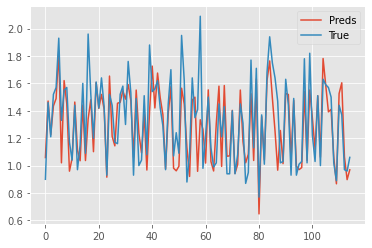

In [ ]:
plt.plot(preds)
plt.plot(y_test)
plt.legend(["Preds", "True"])
plt.show()

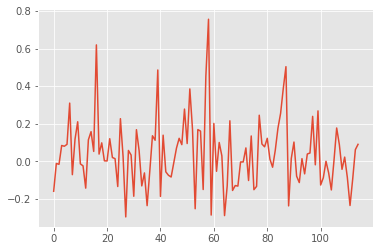

In [ ]:
residuals = y_test-preds
plt.plot(residuals)
plt.show()

In [ ]:
y_val.reset_index(drop=True).values

array([[1.53, 1.36, 1.47, ..., 1.83, 2.1 , 1.78],
       [1.52, 1.37, 1.48, ..., 1.88, 2.24, 2.01],
       [1.61, 1.43, 1.57, ..., 1.96, 2.46, 2.43],
       ...,
       [1.12, 0.96, 1.36, ..., 1.52, 1.63, 1.56],
       [1.35, 0.95, 1.16, ..., 1.54, 1.73, 1.56],
       [1.57, 1.04, 1.23, ..., 1.55, 1.6 , 1.62]])

In [ ]:
y_val.values.shape

(34, 108)

## Multivariate model

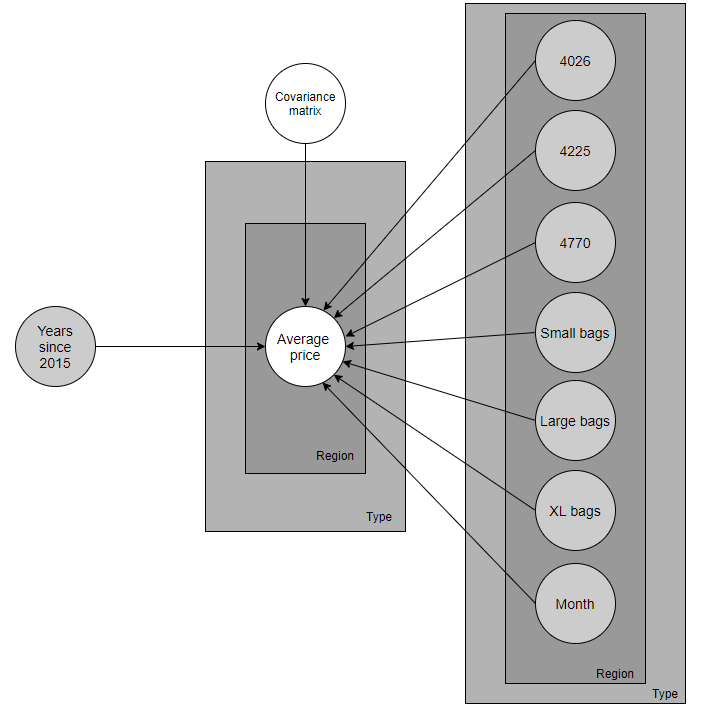

In [ ]:
pyro.clear_param_store()
def model(X, obs=None):
  
    #Getting device
    device = torch.device('cuda:0' if torch.cuda.is_available() else "cpu")

    #Priors for intercept
    alpha = pyro.sample("alpha", dist.Normal(torch.zeros(108,device=device),
                                            1e-5*torch.ones(108,device=device)
                                            ).to_event())         
    if alpha.is_cuda:
        print("alpha is on cuda")

    #Priors for beta values
    beta  = pyro.sample("beta", dist.Normal(torch.zeros(X.shape[1],108,device=device),
                                            1e-6*torch.ones(X.shape[1],108,device=device) ).to_event())
    if beta.is_cuda:
        print("beta is on cuda")

    #Covariance matrix
    L_Omega = pyro.sample("L_Omega", dist.LKJCholesky(108,10*torch.ones(1,device=device)))
    if L_Omega.is_cuda:
        print("L_Omega is on cuda")

    tau = pyro.sample(name="tau", fn=dist.HalfCauchy(scale=1*torch.ones(108,device=device)).to_event() )
    if tau.is_cuda:
        print("tau is on cuda")
    Sigma_lower = torch.matmul(torch.diag(torch.sqrt(tau)), L_Omega)
    if Sigma_lower.is_cuda:
        print("Sigma_lower is on cuda")
    tmp_mean = alpha + X.matmul(beta)
    if tmp_mean.is_cuda:
        print("tmp_mean is on cuda")

    #Estimating y-distribution
    y_dist = dist.MultivariateNormal(loc = tmp_mean, scale_tril = Sigma_lower).to_event()
    y = pyro.sample("y",y_dist, obs=obs)

    if y.is_cuda:
        print("y is on cuda")
    return y

In [ ]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,dom,moy
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,27,12
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,20,12
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,13,12
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,12
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,29,11


In [ ]:
df["year"].value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

In [ ]:
#Defining guide function
guide = AutoDiagonalNormal(model)

#Define the number of optimization steps
n_steps = 40000

#Setup for the optimizer
adam_params = {"lr": 0.001, "weight_decay": 0.2}
optimizer = ClippedAdam(adam_params)

#Setup for the inference algorithm
elbo = Trace_ELBO()
svi = SVI(model, guide, optimizer, loss=elbo)

In [ ]:
# Do gradient steps
for step in range(n_steps):
    elbo = svi.step(X_train_torch, y_train_torch)
    if step % 1000 == 0:
        print("[%d] ELBO: %.1f" % (step, np.log(elbo)))

In [ ]:
predictive = Predictive(model, guide=guide, num_samples=1000,
                        return_sites=("alpha", "beta","L_Omega" ,"tau","y"))
samples = predictive(X_test_torch)

In [ ]:
mean_y = torch.mean(samples['y'],dim=0)#.numpy()
mean_y_np = mean_y.numpy()


In [ ]:
residuals=ytest.iloc[:,:]-mean_y_np[:,:]
plt.plot(residuals)
plt.show()
mae = np.mean(np.mean(np.abs(residuals)))
print("Mean error:", mae)

## Neural network

In [ ]:
#INSERT PGM HERE

We define the neural network. (We could later try change the number of layers and units and also look at the initialization and regularization)

In [ ]:
class FFNN(torch.nn.Module):
    def __init__(self, n_in, n_hidden, n_out):
        super(FFNN, self).__init__()
        
        # Architecture
        self.in_layer = torch.nn.Linear(n_in, n_hidden)
        self.h_layer = torch.nn.Linear(n_hidden, n_hidden)
        self.out_layer = torch.nn.Linear(n_hidden, n_out)
        
        # Activation functions
        self.tanh = torch.nn.Tanh()
        
    def forward(self, X):
        # Forward pass
        X = self.tanh(self.in_layer(X))
        X = self.tanh(self.h_layer(X))
        X = self.out_layer(X)
        
        return X

Now we make it a bayesian model by inputting priors of the weights in the network

In [ ]:
# Indexes of NN-inputs and linear model-inputs
ind_split=17


tensor(13.0264)


/usr/local/lib/python3.7/dist-packages/pyro/primitives.py:451: FutureWarning: The `random_module` primitive is deprecated, and will be removed in a future release. Use `pyro.nn.Module` to create Bayesian modules from `torch.nn.Module` instances.
  "modules from `torch.nn.Module` instances.", FutureWarning)


In [ ]:
def nnet_model(X, y=None):
    # Initialize the neural network from PyTorch 
    torch_model = FFNN(n_in=X.shape[1]-17, n_hidden=4, n_out=ytrain.shape[1])  #-18 because the other 18 goes to the linear model
    
    # Convert the PyTorch neural net into a Pyro model with priors
    priors = {} # Priors for the neural model
    for name, par in torch_model.named_parameters():     # Loop over all neural network parameters
        priors[name] = dist.Normal(torch.zeros(*par.shape), torch.ones(*par.shape)).to_event() # Each parameter has a N(0, 1) prior
    
    bayesian_model = pyro.random_module('bayesian_model', torch_model, priors) # Make this model and these priors a Pyro model
    sampled_model = bayesian_model()                                           # Initialize the model
    
    # Linear model priors
    beta_lin = pyro.sample("beta", dist.Normal(0, 1))
    
    # The generative process
    with pyro.plate("observations"):
        linear_out = X[:,:ind_split]*beta_lin
        l_out=linear_out.sum(axis=1)
        l_out=l_out.unsqueeze(0)
        nn_out = sampled_model(X[:,ind_split:]).squeeze(-1) # Feed-forward the design matrix X through the neural network
        
        y = pyro.sample("obs", dist.Normal(l_out.T+nn_out, 0.1).to_event(), obs=y)
        
    return y

In [ ]:
# Prepare X and y:
xtrain_tensor=torch.tensor(np.array(xtrain)).float()
ytrain_tensor=torch.tensor(np.array(ytrain)).float()
xtest_tensor=torch.tensor(np.array(xtest)).float()

In [ ]:
# Define guide function
guide = AutoDiagonalNormal(nnet_model)

# Reset parameter values
pyro.clear_param_store()

In [ ]:
# Define the number of optimization steps
n_steps = 100000

# Setup the optimizer
adam_params = {"lr": 0.001,"weight_decay": 0.2}
optimizer = ClippedAdam(adam_params)

# Setup the inference algorithm
elbo = Trace_ELBO(num_particles=1)
svi = SVI(nnet_model, guide, optimizer, loss=elbo)

# Do gradient steps
for step in range(n_steps):
    elbo = svi.step(xtrain_tensor, ytrain_tensor)
    if step % 10000 == 0:
        print("[%d] ELBO: %.1f" % (step, elbo))

/usr/local/lib/python3.7/dist-packages/pyro/primitives.py:451: FutureWarning: The `random_module` primitive is deprecated, and will be removed in a future release. Use `pyro.nn.Module` to create Bayesian modules from `torch.nn.Module` instances.
  "modules from `torch.nn.Module` instances.", FutureWarning)


[0] ELBO: 1750835.4
[10000] ELBO: 20329.6
[20000] ELBO: 20027.8
[30000] ELBO: 19718.5
[40000] ELBO: 19777.2
[50000] ELBO: 19778.3
[60000] ELBO: 19827.4
[70000] ELBO: 19743.1
[80000] ELBO: 19736.2
[90000] ELBO: 19823.1


In [ ]:
# Making the predictions
predictive = Predictive(nnet_model, guide=guide, num_samples=1000,
                        return_sites=("obs", "_RETURN"))
samples = predictive(xtest_tensor)

/usr/local/lib/python3.7/dist-packages/pyro/primitives.py:451: FutureWarning: The `random_module` primitive is deprecated, and will be removed in a future release. Use `pyro.nn.Module` to create Bayesian modules from `torch.nn.Module` instances.
  "modules from `torch.nn.Module` instances.", FutureWarning)


(34, 108)
Mean error: 0.2716456340250106


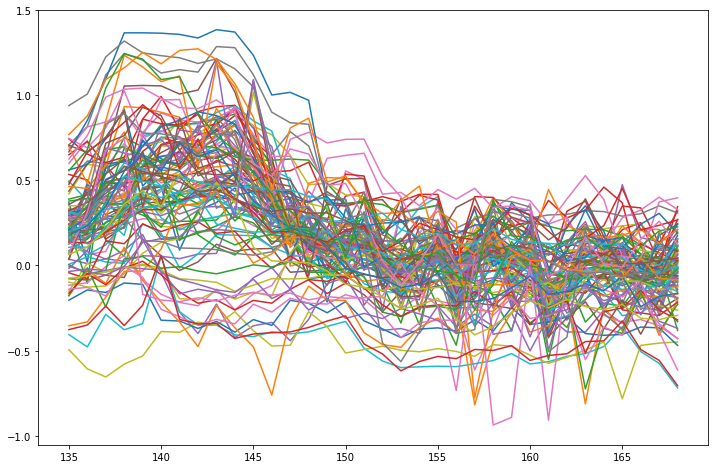

In [ ]:
y_pred = samples["obs"].mean(axis=0).detach().numpy()
y_pred=y_pred.squeeze(0)
print(y_pred.shape)
residuals=ytest - y_pred
mae = np.mean(np.mean(np.abs(residuals)))
plt.plot(residuals)
print("Mean error:", mae)


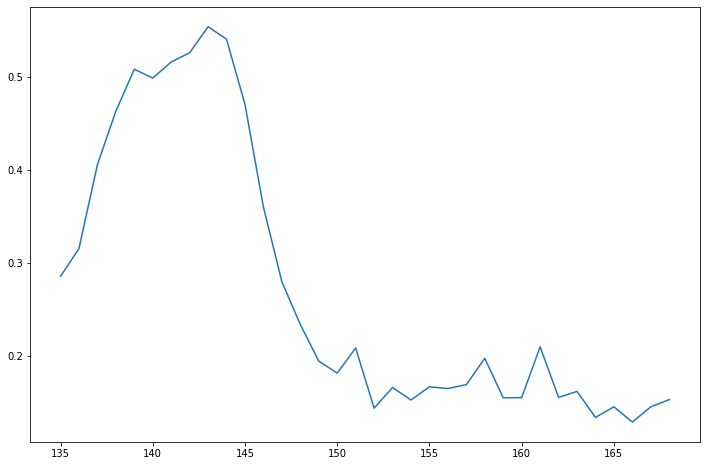

In [ ]:
# Mean error for each time step
error_ts = np.mean(np.abs(residuals),axis=1)
plt.plot(error_ts)

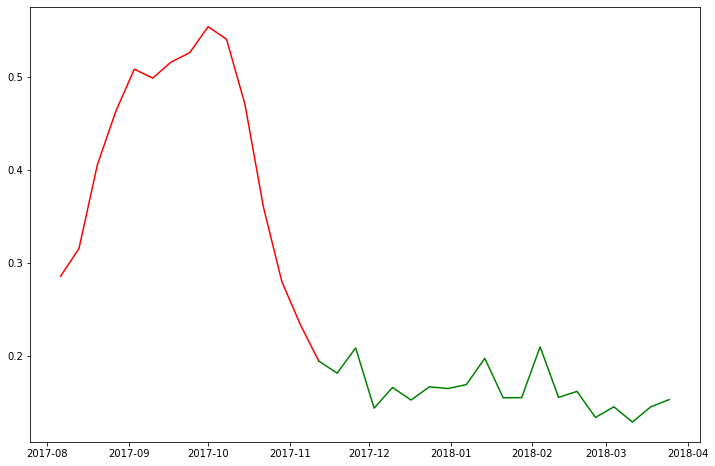

In [ ]:
#We are good at the last observations. Lets look at the time steps of these:
#The bad:
bad=pd.to_datetime(dates[135:150],format='%Y-%m-%d')
bad2=error_ts[:15]
#The good
good=pd.to_datetime(dates[149:],format='%Y-%m-%d')
good2=error_ts[14:]

plt.plot(bad,bad2,color='r')
plt.plot(good,good2,color='g')

##Temporal model

In [ ]:
#Insert PGM here

In [ ]:
#Installing relevant modules
#!pip install numpyro

In [ ]:
#Importing relevant modules
import time
import numpyro
import numpyro.distributions as dist
from numpyro import handlers
from numpyro.infer import MCMC, NUTS
import jax
import jax.numpy as jnp
from jax import random, vmap
from jax.scipy.special import logsumexp
from jax import lax

In [ ]:
#Convert data to a matrix
N, D = y.shape
N_train = len(y_train)
N_test = len(y_val)
split=135

In [ ]:
def f_without_noise(carry, x=None):
  beta1, beta2, z_prev1, z_prev2 = carry
  z_t = beta1*z_prev1 + beta2*z_prev2
  z_prev1 = z_prev2
  z_prev2 = z_t
  return (beta1, beta2, z_prev1, z_prev2), z_t

In [ ]:
beta1 = beta2 = 1.
z_prev1 = z_prev2 = 1.
carry = (beta1, beta2, z_prev1, z_prev2)
carry_updated, z_t = f_without_noise(carry, x=None) # propagating the dynamics forward for 1 time step
print("Initial carried items: \nbeta1: {}, beta2: {}, z_prev1: {}, z_prev2: {}".format(carry[0], carry[1], carry[2], carry[3]))
print("Updated carried items: \nbeta1: {}, beta2: {}, z_prev1: {}, z_prev2: {}".format(carry_updated[0], carry_updated[1], carry_updated[2], carry_updated[3]))
print("Computed z_t: {}".format(z_t))

Initial carried items: 
beta1: 1.0, beta2: 1.0, z_prev1: 1.0, z_prev2: 1.0
Updated carried items: 
beta1: 1.0, beta2: 1.0, z_prev1: 1.0, z_prev2: 2.0
Computed z_t: 2.0


In [ ]:
beta1 = beta2 = 1.
z_prev1 = z_prev2 = 1.
carry = (beta1, beta2, z_prev1, z_prev2)
carry_updated, z_collection = jax.lax.scan(f=f_without_noise, init=carry, xs=None, length=5) # propagating the dynamics forward for 5 time steps
print("Initial carried items: \nbeta1: {}, beta2: {}, z_prev1: {}, z_prev2: {}".format(carry[0], carry[1], carry[2], carry[3]))
print("Final carried items: \nbeta1: {}, beta2: {}, z_prev1: {}, z_prev2: {}".format(carry_updated[0], carry_updated[1], carry_updated[2], carry_updated[3]))
print("Computed z_t (for t=1,...,5):")
for t in range(5):
  print("z{}={}".format(str(t+1), z_collection[t]))

Initial carried items: 
beta1: 1.0, beta2: 1.0, z_prev1: 1.0, z_prev2: 1.0
Final carried items: 
beta1: 1.0, beta2: 1.0, z_prev1: 8.0, z_prev2: 13.0
Computed z_t (for t=1,...,5):
z1=2.0
z2=3.0
z3=5.0
z4=8.0
z5=13.0


In [ ]:
def f(carry, noise_t):
  beta1, beta2, z_prev1, z_prev2, tau = carry
  z_t = beta1*z_prev1 + beta2*z_prev2 + tau*noise_t
  z_prev1 = z_prev2
  z_prev2 = z_t
  return (beta1, beta2, z_prev1, z_prev2, tau), z_t

In [ ]:
#from torch.distributions import constraints

def model(T, T_forecast, obs=None):
    """ 
    Define priors over beta1, beta2, tau, noises, sigma, z_prev1 and z_prev2 (keep the shapes in mind)
    """
    beta1 = numpyro.sample(name="beta_1", fn=dist.Normal(loc=0., scale=5.))
    beta2 = numpyro.sample(name="beta_2", fn=dist.Normal(loc=0., scale=5.))
    tau = numpyro.sample(name="tau", fn=dist.HalfCauchy(scale=3.))
    noises = numpyro.sample("noises", fn=dist.Normal(0., 1.), sample_shape=(T+T_forecast-2,))
    sigma = numpyro.sample(name="sigma", fn=dist.HalfCauchy(scale=3.))
    z_prev1 = numpyro.sample(name="z_1", fn=dist.Normal(loc=0., scale=3.))
    z_prev2 = numpyro.sample(name="z_2", fn=dist.Normal(loc=0., scale=3.))
    
    """ 
    Propagate the dynamics forward using jax.lax.scan
    carry = (beta1, beta2, z_prev1, z_prev2, tau)
    z_collection = [z_prev1, z_prev2]
    """
    carry = (beta1, beta2, z_prev1, z_prev2, tau)
    z_collection = [z_prev1, z_prev2]
    carry, zs_exp = lax.scan(f, carry, noises, T+T_forecast-2)
    z_collection = jnp.concatenate((jnp.array(z_collection), zs_exp), axis=0)
    
    """ 
    Sample the observed_y (y_obs) and predicted_y (y_pred) - note that you don't need a pyro.plate!

    """
    numpyro.sample(name="y_obs", fn=dist.Normal(loc=z_collection[:T], scale=sigma), obs=obs[:T])
    numpyro.sample(name="y_pred", fn=dist.Normal(loc=z_collection[T:], scale=sigma), obs=None)
    return z_collection

In [ ]:
#Run inference using MCMC:
t0 = time.time()

rng_key = random.PRNGKey(0)
rng_key, rng_key_ = random.split(rng_key)

nuts_kernel = NUTS(model=model, max_tree_depth=8, step_size=5e-3, adapt_step_size=False)
mcmc = MCMC(nuts_kernel, num_samples=3000, num_warmup=1000, num_chains=1)
mcmc.run(rng_key_, T=N_train, T_forecast=N_test, obs=np.array(ytrain.iloc[:,0]))

t_fin = time.time()

print("Total time: {0:.3f}m".format((t_fin - t0)/60))

sample: 100%|██████████| 4000/4000 [00:13<00:00, 289.03it/s, 3 steps of size 5.00e-03. acc. prob=0.08]


Total time: 0.334m


In [ ]:
mcmc.print_summary()


                 mean       std    median      5.0%     95.0%     n_eff     r_hat
     beta_1      0.17      0.00      0.17      0.17      0.18      7.10      1.00
     beta_2      0.81      0.00      0.81      0.80      0.81      6.69      1.00
  noises[0]      1.65      0.02      1.65      1.61      1.69      5.02      1.29
  noises[1]     -0.75      0.02     -0.75     -0.78     -0.71      5.34      1.23
  noises[2]      0.95      0.01      0.94      0.93      0.97      3.68      1.61
  noises[3]     -0.34      0.02     -0.34     -0.36     -0.30      7.29      1.24
  noises[4]      0.43      0.04      0.43      0.35      0.49      7.26      1.17
  noises[5]      1.00      0.01      1.00      0.98      1.02      3.31      2.22
  noises[6]      0.03      0.01      0.03      0.02      0.05     10.12      1.14
  noises[7]      1.44      0.02      1.44      1.41      1.47      6.85      1.34
  noises[8]     -0.27      0.04     -0.27     -0.33     -0.21      4.08      1.51
  noises[9]    

Extract samples and plot posteriors over some of the parameters

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


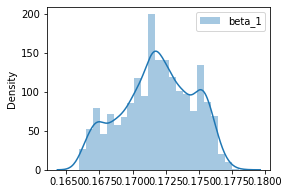

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


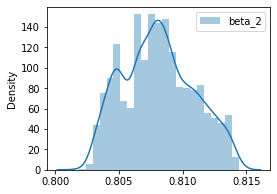

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


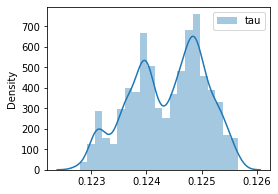

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


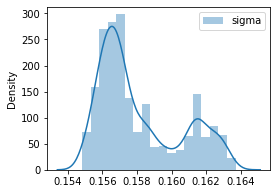

In [ ]:
hmc_samples = {k: v for k, v in mcmc.get_samples().items()}

nodes = ["beta_1", "beta_2", "tau", "sigma"]
for node in nodes:
  plt.figure(figsize=(4,3))
  sns.distplot(hmc_samples[node], label=node)
  plt.legend()
  plt.show()

Make predictions and visualize


In [ ]:
q = hmc_samples["y_pred"]
q_mean = q.mean(axis=0).reshape(-1,)
q_std = q.std(axis=0).reshape(-1,)
y_pred_025 = q_mean - 1.96*q_std
y_pred_975 = q_mean + 1.96*q_std
y_pred_mean = q_mean

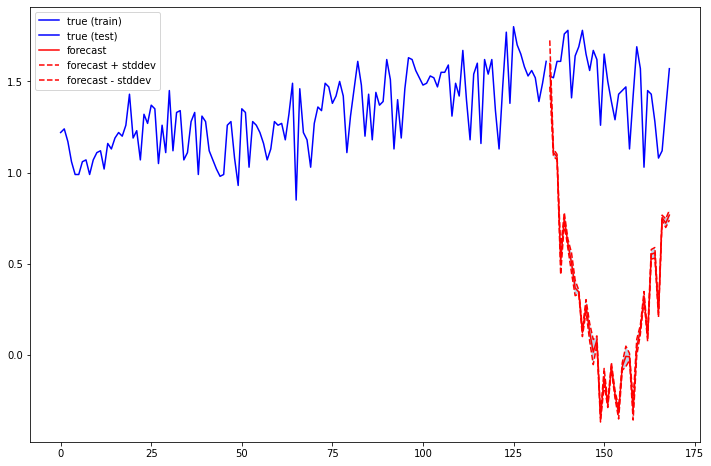

In [ ]:
plt.plot(y_train.index, y_train.iloc[:, 0], "b-")
plt.plot(y_val.index, y_val.iloc[:, 0], "b-")
plt.plot(y_val.index, y_pred_mean, "r-")
plt.plot(y_val.index, y_pred_025, "r--")
plt.plot(y_val.index, y_pred_975, "r--")
plt.fill_between(y_val.index, y_pred_025, y_pred_975, alpha=0.3)
plt.legend(["true (train)","true (test)","forecast","forecast + stddev","forecast - stddev"])
plt.show()

In [ ]:
residuals=y_val.iloc[:, 0] - y_pred_mean
error_ar = np.mean(np.abs(residuals),axis=1)
plt.plot(error_ar)
plt.show()

SyntaxError: ignored

We should probably include som more ar-terms